# Regresión lineal sobre datos encuesta CASEN

In [2]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
archivo_sav = 'Casen_2017.sav'
datos_casen, metadatos = pyreadstat.read_sav(archivo_sav)

In [74]:
datos_casen.head()

,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
0,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN
1,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
3,1.101100e+11,2.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
4,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0,NaN


In [75]:
datos2 = pd.DataFrame({'o13': datos_casen.o13, 'y0101': datos_casen.y0101})
datos2.head(20)

,o13,y0101
0,1994.0,NaN
1,2015.0,200000.0
2,2016.0,270000.0
3,2017.0,300000.0
4,2016.0,320000.0
5,NaN,NaN
6,NaN,NaN
7,2017.0,NaN
8,NaN,NaN
9,2012.0,270000.0


In [76]:
datos2.describe()

,o13,y0101
count,92417.000000,6.309900e+04
mean,2054.457935,5.095371e+05
std,601.742237,5.860381e+05
min,1930.000000,3.000000e+03
25%,2006.000000,2.700000e+05
50%,2013.000000,3.500000e+05
75%,2016.000000,5.500000e+05
max,9999.000000,3.400000e+07


In [77]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   o13     92417 non-null  float64
 1   y0101   63099 non-null  float64
dtypes: float64(2)
memory usage: 3.3 MB


In [78]:
datos_limpios=datos2.dropna()
datos_limpios.head(20)

,o13,y0101
1,2015.0,200000.0
2,2016.0,270000.0
3,2017.0,300000.0
4,2016.0,320000.0
9,2012.0,270000.0
10,2017.0,270000.0
11,2017.0,270000.0
15,2006.0,200000.0
17,2017.0,400000.0
21,2010.0,380000.0


In [79]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63099 entries, 1 to 216429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   o13     63099 non-null  float64
 1   y0101   63099 non-null  float64
dtypes: float64(2)
memory usage: 1.4 MB


In [82]:
datos_limpios['experiencia']=2017-datos_limpios.o13
datos_limpios['log_ingresos']=np.log(datos_limpios.y0101)

C:\Users\darli\AppData\Local\Temp\ipykernel_3496\4099313845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['experiencia']=2017-datos_limpios.o13
C:\Users\darli\AppData\Local\Temp\ipykernel_3496\4099313845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['log_ingresos']=np.log(datos_limpios.y0101)


In [83]:
datos_limpios.describe()

,o13,y0101,experiencia,log_ingresos
count,63099.000000,6.309900e+04,63099.000000,63099.000000
mean,2042.393588,5.095371e+05,-25.393588,12.858401
std,505.923827,5.860381e+05,505.923827,0.701660
min,1930.000000,3.000000e+03,-7982.000000,8.006368
25%,2008.000000,2.700000e+05,0.000000,12.506177
50%,2014.000000,3.500000e+05,3.000000,12.765688
75%,2017.000000,5.500000e+05,9.000000,13.217674
max,9999.000000,3.400000e+07,87.000000,17.341871


In [84]:
datos_limpios=datos_limpios[datos_limpios.experiencia>=0]
datos_limpios.describe()

,o13,y0101,experiencia,log_ingresos
count,62247.000000,6.224700e+04,62247.000000,62247.000000
mean,2010.160859,5.106037e+05,6.839141,12.860948
std,9.263800,5.859436e+05,9.263800,0.700981
min,1930.000000,3.000000e+03,0.000000,8.006368
25%,2007.000000,2.700000e+05,0.000000,12.506177
50%,2014.000000,3.500000e+05,3.000000,12.765688
75%,2017.000000,5.500000e+05,10.000000,13.217674
max,2017.000000,3.400000e+07,87.000000,17.341871


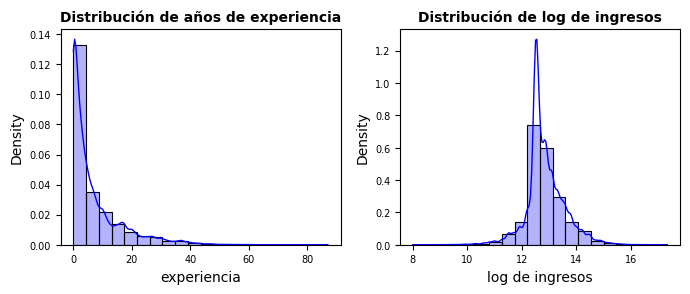

In [51]:
#Histograma de las variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

#histograma variable x
sns.histplot(
    data    = datos_limpios['experiencia'],
     bins=20,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "blue",
    alpha   = 0.3,
    ax      = axes[0]
)
axes[0].set_title('Distribución de años de experiencia', fontsize = 10,
                     fontweight = "bold")
axes[0].set_xlabel("experiencia")
axes[0].tick_params(labelsize = 7)
#axes[0].set_ylim([0, 0.5])  # Cambiar el intervalo del eje y según tus necesidades

#histograma variable y
sns.histplot(
    data    = datos_limpios['log_ingresos'],
    bins=20,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "blue",
    alpha   = 0.3,
    ax      = axes[1]
)
axes[1].set_title('Distribución de log de ingresos', fontsize = 10,
                     fontweight = "bold")
axes[1].set_xlabel("log de ingresos")
axes[1].tick_params(labelsize = 7)
#axes[1].set_ylim([0, 0.000000000001])  # Cambiar el intervalo del eje y según tus necesidades

fig.tight_layout()
plt.subplots_adjust(top=0.9)

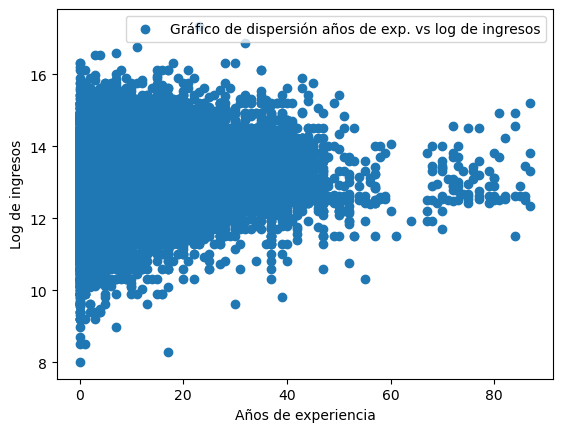

In [53]:
# Gráfico de dispersión
plt.scatter(datos_limpios.experiencia, datos_limpios.log_ingresos, label='Gráfico de dispersión años de exp. vs log de ingresos')
plt.xlabel('Años de experiencia')
plt.ylabel('Log de ingresos')
plt.legend()
plt.show()

In [54]:
corr_test = pearsonr(x = datos_limpios.experiencia, y =  datos_limpios.log_ingresos)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.20030311472718587
P-value:  0.0


In [55]:
#Creación de la matriz de diseño X
datos_limpios['intercepto'] = 1
#Definición de X e y
X = datos_limpios[['intercepto', 'experiencia']]
y = datos_limpios['log_ingresos']
#Ajuste del modelo
modelo = sm.OLS(y, X) #Crea el modelo de regresión lineal
ajuste = modelo.fit() #Ajusta el modelo llamando el método fit
print(ajuste.summary())

                            OLS Regression Results                            
Dep. Variable:           log_ingresos   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2602.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:57:42   Log-Likelihood:                -64935.
No. Observations:               62247   AIC:                         1.299e+05
Df Residuals:                   62245   BIC:                         1.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercepto     12.7573      0.003   3728.457      

In [56]:
intervalos_ci = ajuste.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
intercepto,12.750582,12.763995
experiencia,0.014574,0.015739


In [57]:
#Calculo de residuos
prediccion_y = ajuste.predict(exog = X)
residuos = prediccion_y - y

C:\Users\darli\AppData\Local\Temp\ipykernel_3496\2316167894.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
C:\Users\darli\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


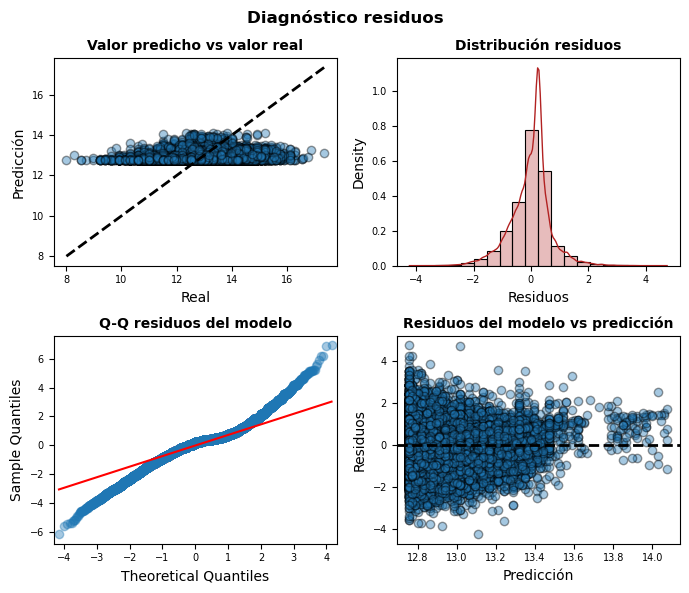

In [60]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))

#y vs y_hat
axes[0, 0].scatter(y, prediccion_y, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#histograma residuos
sns.histplot(
    data    = residuos,
    bins=20,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0, 1]
)
axes[0, 1].set_title('Distribución residuos', fontsize = 10,
                     fontweight = "bold")
axes[0, 1].set_xlabel("Residuos")
axes[0, 1].tick_params(labelsize = 7)

#qqplot
sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 0], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 0].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 0].tick_params(labelsize = 7)

#y_hat vs residuos
axes[1, 1].scatter(prediccion_y, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[1, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1, 1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].tick_params(labelsize = 7)


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [59]:
shapiro_test = stats.shapiro(residuos)
shapiro_test

C:\Users\darli\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9570332765579224, pvalue=0.0)

In [61]:
durbin_watson = sm.stats.stattools.durbin_watson(residuos)
durbin_watson

1.3043861857717531

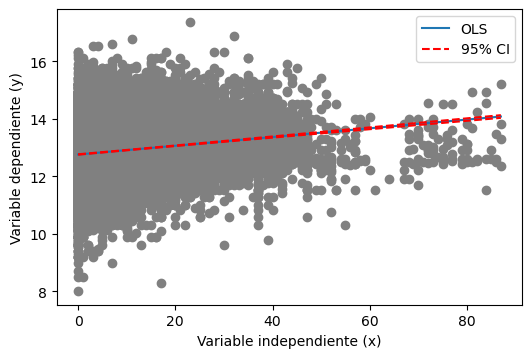

In [63]:
predicciones = ajuste.get_prediction(exog = X).summary_frame(alpha=0.05)
predicciones['x'] = datos_limpios.experiencia
predicciones['y'] = y
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.set_xlabel('Variable independiente (x)')
ax.set_ylabel('Variable dependiente (y)')
ax.legend();